![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

from sklearn import linear_model
from sklearn.model_selection import train_test_split

import statsmodels.api as sm

In [3]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [4]:
# Celda 1.1
bikes.groupby('season').total.mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64

In [5]:
bikes.groupby('season').total.sum()

season
1    312498
2    588282
3    640662
4    544034
Name: total, dtype: int64

In [6]:
bikes.groupby('season').total.describe()[['count', 'max', 'std']]

,count,max,std
season,,,
1,2686.0,801.0,125.273974
2,2733.0,873.0,192.007843
3,2733.0,977.0,197.151001
4,2734.0,948.0,177.622409


Segun la definición de la columna ( season 1:winter, 2:spring, 3:summer, 4:fall )
la temporada con mas renta total de bicicletas es verano (con 640662) donde puede ser mas favorable el clima para usar biciclieta,
y la temporada con menos renta total de bicilatas es invierno (con 312498).

In [7]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

In [8]:
bikes.groupby('hour').total.sum()

hour
0      25088
1      15372
2      10259
3       5091
4       2832
5       8935
6      34698
7      96968
8     165060
9     100910
10     79667
11     95857
12    116968
13    117551
14    111010
15    115960
16    144266
17    213757
18    196472
19    143767
20    104204
21     79057
22     60911
23     40816
Name: total, dtype: int64

In [9]:
bikes.groupby('hour').total.describe()[['count', 'max', 'std']]

,count,max,std
hour,,,
0,455.0,283.0,43.620012
1,454.0,168.0,34.112105
2,448.0,119.0,26.110267
3,433.0,66.0,12.666442
4,442.0,28.0,4.217633
5,452.0,57.0,12.784293
6,455.0,213.0,54.745333
7,455.0,596.0,159.207044
8,455.0,839.0,231.723065


Segun la definición de la columna  ( hour 0 to 23 )
la hora que registra mas renta total de bicicletas es a las 17hrs (con 213757) (coincide con la salida o fin de horario laboral), y la hora que registra menos renta total de bicilatas es a las 4hrs (con 2832).

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<AxesSubplot:xlabel='hour'>

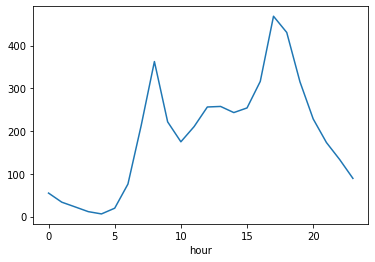

In [10]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

In [11]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 
bikes_s1 = bikes[bikes["season"] == 1]

# Visualización de los datos
bikes_s1.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


In [12]:
bikes_s1.groupby('hour').total.mean()

hour
0      28.292035
1      18.761062
2      13.205607
3       7.760417
4       3.336634
5      10.300000
6      42.725664
7     124.433628
8     253.345133
9     154.442478
10    102.168142
11    122.601770
12    154.412281
13    160.771930
14    151.263158
15    159.087719
16    188.640351
17    283.456140
18    258.157895
19    176.315789
20    124.394737
21     95.298246
22     72.912281
23     45.333333
Name: total, dtype: float64

<AxesSubplot:xlabel='hour'>

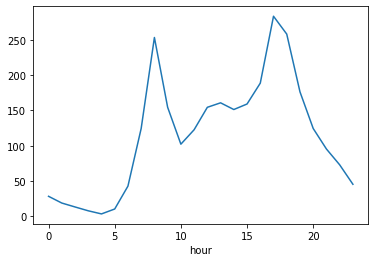

In [13]:
# Rentas promedio para cada valor de la variable "hour" y "season"=1
bikes_s1.groupby('hour').total.mean().plot()

Segun la grafica de renta de bicicletas en invierno, el vr máximo de la media se encuentra a las 17hrs (283.45) y el mínino de la media se encuentra a las 4hrs (3.33)

In [14]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 
bikes_s3 = bikes[bikes["season"] == 3]

# Visualización de los datos
bikes_s3.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-07-01 00:00:00,3,0,1,1,27.06,31.060,50,0.0,20,48,68,0
2011-07-01 01:00:00,3,0,1,1,27.06,31.060,50,0.0,15,16,31,1
2011-07-01 02:00:00,3,0,1,1,25.42,30.305,69,0.0,6,7,13,2
2011-07-01 03:00:00,3,0,1,1,26.24,31.060,53,0.0,5,6,11,3
2011-07-01 04:00:00,3,0,1,1,25.42,31.060,57,0.0,1,5,6,4


In [15]:
bikes_s3.groupby('hour').total.mean()

hour
0      75.675439
1      44.831858
2      31.707965
3      15.778761
4       8.087719
5      25.728070
6      96.780702
7     264.035088
8     403.508772
9     250.710526
10    218.535088
11    256.877193
12    307.017544
13    304.421053
14    286.350877
15    294.956140
16    371.324561
17    565.385965
18    539.070175
19    413.500000
20    307.842105
21    236.017544
22    180.789474
23    121.719298
Name: total, dtype: float64

<AxesSubplot:xlabel='hour'>

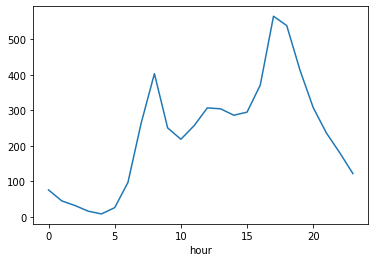

In [16]:
# Rentas promedio para cada valor de la variable "hour" y "season"=3
bikes_s3.groupby('hour').total.mean().plot()

Segun la grafica de renta de bicicletas en verano, el vr máximo de la media se encuentra a las 17hrs (565.38) y el mínino de la media se encuentra a las 4hrs (8.08)

Segun la grafica de renta de bicicletas en invierno, el vr máximo de la media se encuentra a las 17hrs (283.45) y el mínino de la media se encuentra a las 4hrs (3.33)

Teniendo en cuenta los valores de la media de renta de bicicletas que vemos en este punto 2, los valores son mucho mayores en verano que en invierno.
En resumen, la diferencia es de casi el doble para el máximo de la media, y de casi el triple del mínimo de la media.

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [17]:
# Celda 3
vars_pred = bikes[['season','hour']]
var_resp = bikes[['total']]

In [18]:
vars_pred.head(200)

,season,hour
datetime,,
2011-01-01 00:00:00,1,0
2011-01-01 01:00:00,1,1
2011-01-01 02:00:00,1,2
2011-01-01 03:00:00,1,3
2011-01-01 04:00:00,1,4
...,...,...
2011-01-09 10:00:00,1,10
2011-01-09 11:00:00,1,11
2011-01-09 12:00:00,1,12


In [19]:
var_resp.head(200)

,total
datetime,
2011-01-01 00:00:00,16
2011-01-01 01:00:00,40
2011-01-01 02:00:00,32
2011-01-01 03:00:00,13
2011-01-01 04:00:00,1
...,...
2011-01-09 10:00:00,49
2011-01-09 11:00:00,49
2011-01-09 12:00:00,83


In [20]:
# Creando columnas dummy para la var categorica season
status = pd.get_dummies(vars_pred['season'], drop_first = True)
vars_pred = pd.concat([vars_pred, status], axis = 1)
vars_pred.drop(['season'], axis = 1, inplace = True)
vars_pred.head(300)

,hour,2,3,4
datetime,,,,
2011-01-01 00:00:00,0,0,0,0
2011-01-01 01:00:00,1,0,0,0
2011-01-01 02:00:00,2,0,0,0
2011-01-01 03:00:00,3,0,0,0
2011-01-01 04:00:00,4,0,0,0
...,...,...,...,...
2011-01-13 18:00:00,18,0,0,0
2011-01-13 19:00:00,19,0,0,0
2011-01-13 20:00:00,20,0,0,0


In [21]:
# Creando sets de entrenamiento y pruebas
XTrain, XTest, yTrain, yTest = train_test_split(vars_pred, var_resp, test_size=0.33, random_state=0)

In [22]:
#  modelo lineal con sklearn
regr = linear_model.LinearRegression()
regr.fit(vars_pred, var_resp)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 [-6.43026246]
Coefficients: 
 [[ 10.54520609 100.31723192 119.46754995  84.08311787]]


In [23]:
# modelo lineal con statsmodels
vars_pred2 = sm.add_constant(vars_pred) # adding a constant
 
model = sm.OLS(var_resp, vars_pred2).fit()
predictions = model.predict(vars_pred2) 
 
print_model = model.summary()
print(print_model)


                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     782.5
Date:                Sun, 02 Apr 2023   Prob (F-statistic):               0.00
Time:                        23:31:42   Log-Likelihood:                -70669.
No. Observations:               10886   AIC:                         1.413e+05
Df Residuals:                   10881   BIC:                         1.414e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.4303      4.016     -1.601      0.1

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [24]:
# Definición de parámetros y criterios de parada
max_depth = None
num_pct = 10
max_features = None
min_gain=0.001
X=vars_pred
y=var_resp

In [25]:
X.head(200)

,hour,2,3,4
datetime,,,,
2011-01-01 00:00:00,0,0,0,0
2011-01-01 01:00:00,1,0,0,0
2011-01-01 02:00:00,2,0,0,0
2011-01-01 03:00:00,3,0,0,0
2011-01-01 04:00:00,4,0,0,0
...,...,...,...,...
2011-01-09 10:00:00,10,0,0,0
2011-01-09 11:00:00,11,0,0,0
2011-01-09 12:00:00,12,0,0,0


In [26]:
y.head(200)

,total
datetime,
2011-01-01 00:00:00,16
2011-01-01 01:00:00,40
2011-01-01 02:00:00,32
2011-01-01 03:00:00,13
2011-01-01 04:00:00,1
...,...
2011-01-09 10:00:00,49
2011-01-09 11:00:00,49
2011-01-09 12:00:00,83


In [27]:
# Impresión variable a usar (hour)
j = 1
print(X.columns[j])

2


In [28]:
# División de la variable hour en num_ctp puntos (parámetro definido anteriormente) para obtener posibles puntos de corte
splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / num_pct).tolist())
splits = np.unique(splits)
splits

array([0., 1.])

In [29]:
# División de las observaciones usando el punto de corte en la posición 5 de la lista de splits
k=1
filter_l = X.iloc[:, j] < splits[k]

# División de la variable de respuesta de acuerdo a si la observación cumple o no con la regla binaria
# y_l: la observación tiene un valor menor al punto de corte seleccionado
# y_r: la observación tiene un valor mayor o igual al punto de corte seleccionado
y_l = y.loc[filter_l]
y_r = y.loc[~filter_l]

In [30]:
# Definición de la función que calcula el gini index
def gini(y):
    if y.shape[0] == 0:
        return 0
    else:
        return 1 - (y.mean()**2 + (1 - y.mean())**2)

In [31]:
# Gini index de las observaciones que tienen un valor menor al punto de corte seleccionado
gini_l = gini(y_l)
gini_l

total   -67077.959817
dtype: float64

In [32]:
# Gini index de las observaciones que tienen un valor mayor o igual al punto de corte seleccionado
gini_r = gini(y_r)
gini_r

total   -92235.803654
dtype: float64

In [33]:
# Definición de la función gini_imputiry para calular la ganancia de una variable predictora j dado el punto de corte k
def gini_impurity(X_col, y, split):
    
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    
    gini_y = gini(y)
    gini_l = gini(y_l)
    gini_r = gini(y_r)
    
    gini_impurity_ = gini_y - (n_l / (n_l + n_r) * gini_l + n_r / (n_l + n_r) * gini_r)
    
    return gini_impurity_

In [34]:
# Ganancia de la variable hour en el punto de corte selecionado
gini_impurity(X.iloc[:, j], y, splits[k])

total    375.849819
dtype: float64

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [35]:
# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 21)

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
accuracy_scores = []

# Importación de modelos de sklearn 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, X, y, cv=10, scoring='accuracy').mean())


Text(0, 0.5, 'Accuracy')

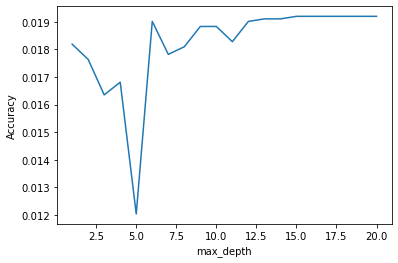

In [36]:
# Gráfica max_depth versus RMSE (error del modelo)
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

In [37]:
# Mejor accuracy (desempeño del modelo) y su correspondiente max_depth
sorted(zip(accuracy_scores, max_depth_range))[::-1][0]

(0.019198164803111324, 20)

In [38]:
# max_depth=4 fue el mejor, se ajusta un árbol usando este valor 
clf = DecisionTreeClassifier(max_depth=4, random_state=1)
clf.fit(X, y)

DecisionTreeClassifier(max_depth=4, random_state=1)

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [39]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [40]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [41]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [42]:
# Celda 6


### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth tome un valor de su elección\
-100 árboles de decisión donde min_samples_leaf tome un valor de su elección\
-100 regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

In [43]:
# Creación de 100 muestras de bootstrap
n_estimators = 100
np.random.seed(123)

n_samples = X_train.shape[0]
samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(n_estimators)]

In [44]:
# Entrenamiento de 100 modelos con las 100 muestras boostrap

from sklearn.tree import DecisionTreeClassifier

np.random.seed(123) 
seeds = np.random.randint(1, 10000, size=n_estimators)

trees = {}
for i in range(n_estimators):
    trees[i] = DecisionTreeClassifier(max_features="sqrt", max_depth=None, random_state=seeds[i])
    trees[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])

In [45]:
# Predicción para los datos del set de test con cada modelo
y_pred_df = pd.DataFrame(index=X_test.index, columns=list(range(n_estimators)))
for i in range(n_estimators):
    y_pred_df.iloc[:, i] = trees[i].predict(X_test)

y_pred_df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
1483,0,0,1,0,1,0,1,1,0,1,...,0,1,1,1,0,0,1,1,1,1
2185,1,1,1,1,0,1,1,1,1,1,...,1,1,0,1,1,0,1,1,1,0
2520,1,0,1,1,1,0,0,1,0,0,...,1,1,0,1,0,1,1,1,1,1
3721,0,1,1,1,1,1,1,1,0,1,...,0,1,0,1,0,1,1,1,1,1
3727,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1


In [46]:
# Votación mayoritaria
y_pred = (y_pred_df.sum(axis=1) >= (n_estimators / 2)).astype(np.int)

# Desempeño al hacer votación mayoritaria
from sklearn import metrics
metrics.f1_score(y_pred, y_test)

0.6618892508143323

In [48]:
# Desempeño al hacer votación mayoritaria
metrics.accuracy_score(y_pred, y_test)

0.654

In [49]:
# Definición del modelo BaggingClassifier de la libreria sklearn
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)


In [50]:
# Predicción y desempeño al hacer votación mayoritaria
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)


(0.642384105960265, 0.64)

In [51]:
Score_vm = metrics.f1_score(y_pred, y_test)
Accur_vm = metrics.accuracy_score(y_pred, y_test)

### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [52]:
# Definición del modelo BaggingClassifier de la libreria sklearn
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

# Predicción y desempeño al hacer votación mayoritaria
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.642384105960265, 0.64)

In [53]:
# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
errors = np.zeros(clf.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], clf.n_estimators))

for i in range(clf.n_estimators):
    oob_sample = ~clf.estimators_samples_[i]
    y_pred_ = clf.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = clf.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)

In [54]:
# Desempeño al hacer votación ponderada
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.6513761467889909, 0.6453333333333333)

In [55]:
Score_vp = metrics.f1_score(y_pred, y_test)
Accur_vp = metrics.accuracy_score(y_pred, y_test)

### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

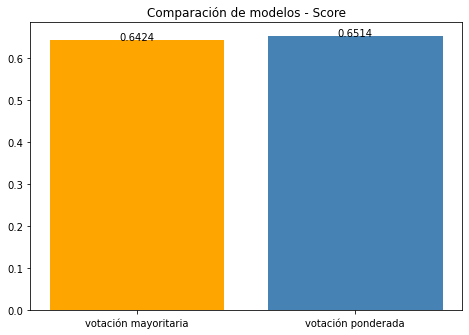

In [56]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos - Score")
ejeX = ['votación mayoritaria', 'votación ponderada']
ejeY = [Score_vm, Score_vp]
ax.bar(ejeX,ejeY)
ax.bar(ejeX,ejeY, color = [ 'orange', 'steelblue'])
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i], '{:.4f}'.format(y[i]), horizontalalignment='center')
addlabels(ejeX,ejeY,plt)
plt.show()

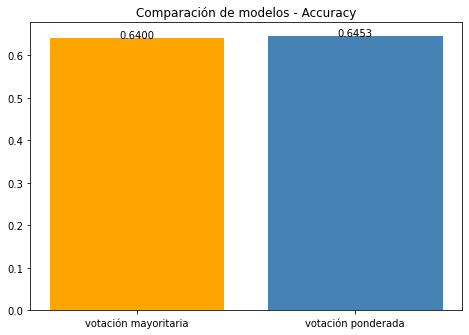

In [57]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos - Accuracy")
ejeX = ['votación mayoritaria', 'votación ponderada']
ejeY = [Accur_vm, Accur_vp]
ax.bar(ejeX,ejeY)
ax.bar(ejeX,ejeY, color = [ 'orange', 'steelblue'])
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i], '{:.4f}'.format(y[i]), horizontalalignment='center')
addlabels(ejeX,ejeY,plt)
plt.show()

Los valores de predicción y desempeño son menores para metodología de Votación mayoritaria, y mantienen una diferencia minima con metodología de Votación ponderada.
Posiblemente con una mayor cantidad de registros,  y menos sesgo en las medidas estos valores podrían marcar mayores diferencias en la predicción y desempeño de estas metodologías